#**Libraries**

In [1]:
!pip install tabulate

In [2]:
!git clone https://github.com/ealeongomez/Data.git

Cloning into 'Data'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 35 (delta 5), reused 27 (delta 3), pack-reused 0
Receiving objects: 100% (35/35), 16.49 MiB | 14.47 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [3]:
!git clone https://github.com/ealeongomez/Predictive-Modeling-Using-a-Clustering-Based-Approach.git

Cloning into 'Predictive-Modeling-Using-a-Clustering-Based-Approach'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 8 (delta 0), pack-reused 0
Receiving objects: 100% (8/8), done.


In [4]:
# Basic packages
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA

In [5]:
os.chdir('/content/Predictive-Modeling-Using-a-Clustering-Based-Approach')

In [6]:
ls -l

total 8
drwxr-xr-x 2 root root 4096 Mar 24 16:49 Functions/
-rw-r--r-- 1 root root   56 Mar 24 16:49 README.md


In [7]:
from Functions.Functions import ForecastingModels
from Functions.organizeData import selectSamples

#**Variables**

In [8]:
neurons = 50
epochs = 50
predictionHorizonMax = 7
window = 10
data_timeSerie = 'Argone_IL'
n_clusters = 100
thresholds = [0.000001, 0.00001, 0.0001, 0.001]
batch_size = 8192

In [9]:
dataSet = {}

#**Load data**

Dataset 1: Argonne

In [10]:
df_1 = pd.read_csv("/content/Data/WindSpeed/Argone_IL.txt", sep="\t",  names=['yyyymmdd','hhmn','mph','code'])

df_1.head()

,yyyymmdd,hhmn,mph,code
0,19480101,100,10.92,131
1,19480101,200,10.92,131
2,19480101,300,10.92,131
3,19480101,400,10.92,131
4,19480101,500,10.92,131


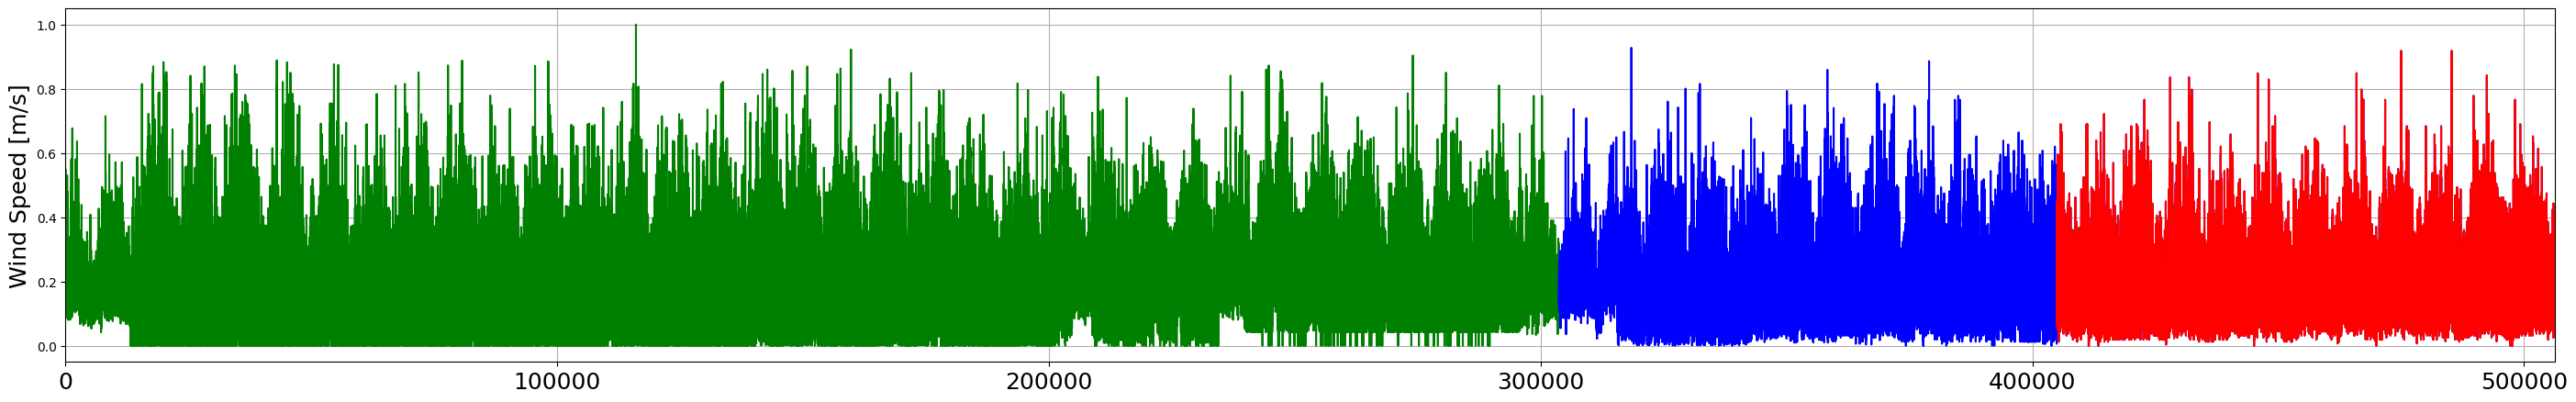

In [11]:
df_1["sped"] = pd.to_numeric(df_1["mph"], downcast="float")
timeSerie_1 = df_1.iloc[:,2].values

valueMax = max(timeSerie_1)

val = valueMax

timeSerie_1 = (timeSerie_1-min(timeSerie_1))/(max(timeSerie_1)-min(timeSerie_1))
samples = round(len(timeSerie_1)*0.80)

timeSerie_training_1 = timeSerie_1[0:samples]
timeSerie_test_1     = timeSerie_1[samples:]
time_1 = np.arange(0, len(timeSerie_1),1)

# Ploter el conjunto de datos
plt.figure(figsize=(35,5))
plt.plot(time_1[0:round(len(timeSerie_1)*0.60)], timeSerie_1[0:round(len(timeSerie_1)*0.60)], 'g', label= 'Training samples')
plt.plot(time_1[round(len(timeSerie_1)*0.60):round(len(timeSerie_1)*0.60)+samples], timeSerie_1[round(len(timeSerie_1)*0.60):round(len(timeSerie_1)*0.60)+samples], 'b', label= 'Validation')
plt.plot(time_1[samples:], timeSerie_1[samples:], 'r', label= 'Test')
plt.xticks(fontsize=18)
plt.ylabel('Wind Speed [m/s]', fontsize=18)
plt.xlim(0, timeSerie_1.shape[0])
#plt.legend(ncol=3, prop={'size': 18})
plt.grid(True)
plt.show()

In [12]:
selectSamples_ = selectSamples(timeSerie_training_1, predictionHorizonMax, window)
X_, y_ = selectSamples_.SerieMatriz()

selectSamples_test = selectSamples(timeSerie_test_1, predictionHorizonMax, window)
X_test, y_test = selectSamples_test.SerieMatriz()


In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=0.2, random_state=42)
dataSet.update({'Argone_IL':{'train': [X_train, y_train], 'test': [X_test, y_test], 'valid':[X_valid, y_valid]}})

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((323976, 10), (323976, 7), (80994, 10), (80994, 7), (101230, 10), (101230, 7))

**DataSet 2: Beijing_Airport_China**

In [14]:
df_2 = pd.read_csv('/content/Data/WindSpeed/Beijing_Airport_China.txt', delimiter=",")

df_2.head()

,station,valid,sped
0,ZBAA,2011-08-01 00:00,2.24
1,ZBAA,2011-08-01 00:30,2.24
2,ZBAA,2011-08-01 01:00,2.24
3,ZBAA,2011-08-01 01:30,2.24
4,ZBAA,2011-08-01 02:00,4.47


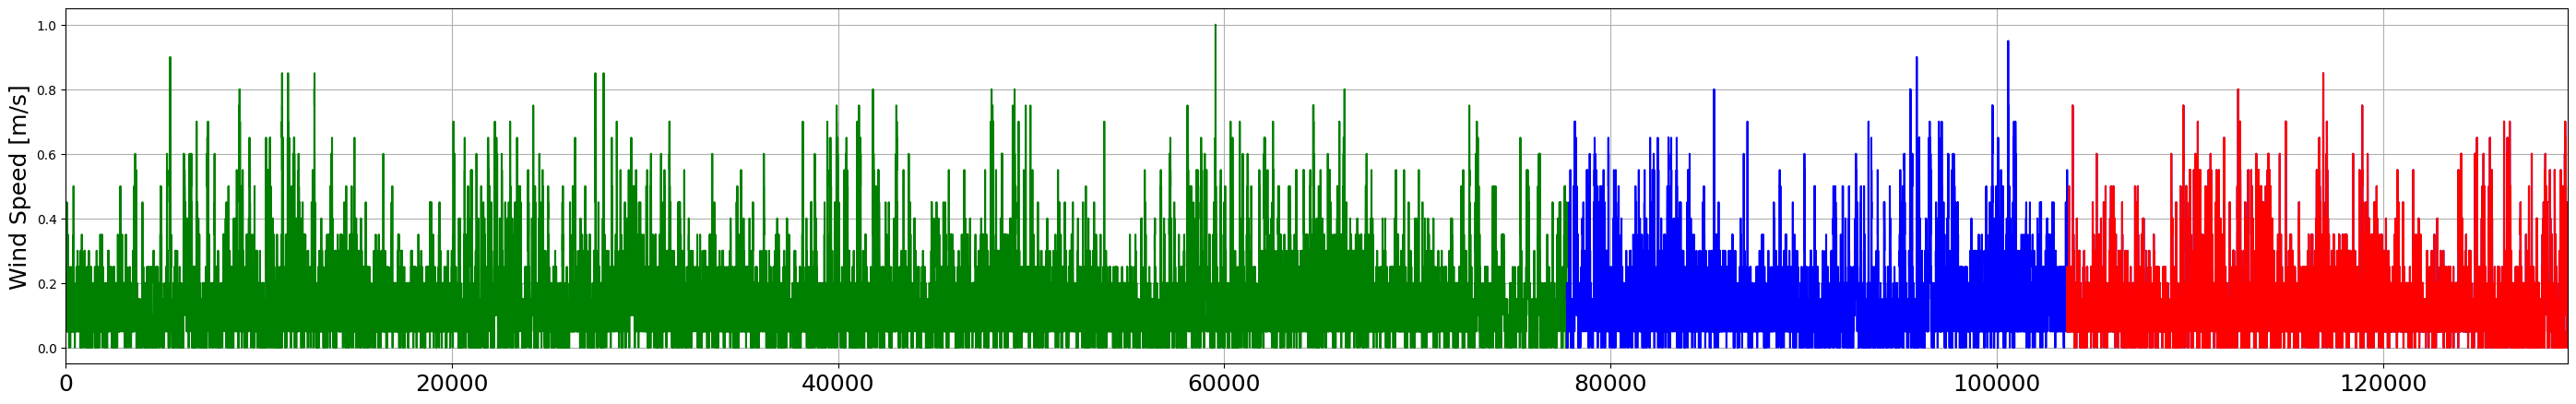

In [15]:
df_2["sped"] = pd.to_numeric(df_2["sped"], downcast="float")
timeSerie_2 = df_2.iloc[:,2].values

valueMax = max(timeSerie_2)

timeSerie_2 = (timeSerie_2-min(timeSerie_2))/(max(timeSerie_2)-min(timeSerie_2))

samples = round(len(timeSerie_2)*0.80)

timeSerie_training_2 = timeSerie_2[0:samples]
timeSerie_test_2     = timeSerie_2[samples:]
time_2 = np.arange(0, len(timeSerie_2),1)

# Ploter el conjunto de datos
plt.figure(figsize=(35,5))
plt.plot(time_2[0:round(len(timeSerie_2)*0.60)], timeSerie_2[0:round(len(timeSerie_2)*0.60)], 'g', label= 'Training samples')
plt.plot(time_2[round(len(timeSerie_2)*0.60):round(len(timeSerie_2)*0.60)+samples], timeSerie_2[round(len(timeSerie_2)*0.60):round(len(timeSerie_2)*0.60)+samples], 'b', label= 'Validation')
plt.plot(time_2[samples:], timeSerie_2[samples:], 'r', label= 'Test')
plt.xticks(fontsize=18)
plt.ylabel('Wind Speed [m/s]', fontsize=18)
plt.xlim(0, timeSerie_2.shape[0])
#plt.legend(ncol=3, prop={'size': 18})
plt.grid(True)
plt.show()

In [16]:
selectSamples_ = selectSamples(timeSerie_training_1, predictionHorizonMax, window)
X_, y_ = selectSamples_.SerieMatriz()

selectSamples_test = selectSamples(timeSerie_test_1, predictionHorizonMax, window)
X_test, y_test = selectSamples_test.SerieMatriz()

X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=0.2, random_state=42)
dataSet.update({'Beijing_Airport_China':{'train': [X_train, y_train], 'test': [X_test, y_test], 'valid':[X_valid, y_valid]}})

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((323976, 10), (323976, 7), (80994, 10), (80994, 7), (101230, 10), (101230, 7))

**Dataset 3: Chengdu_Airport_China**

In [17]:
df_3 = pd.read_csv("/content/Data/WindSpeed/Chengdu_Airport_China.txt", sep=",")

df_3.head()

,station,valid,sped
0,ZUUU,2011-01-01 00:00,8.94
1,ZUUU,2011-01-01 01:00,4.47
2,ZUUU,2011-01-01 02:00,6.71
3,ZUUU,2011-01-01 03:00,6.71
4,ZUUU,2011-01-01 04:00,6.71


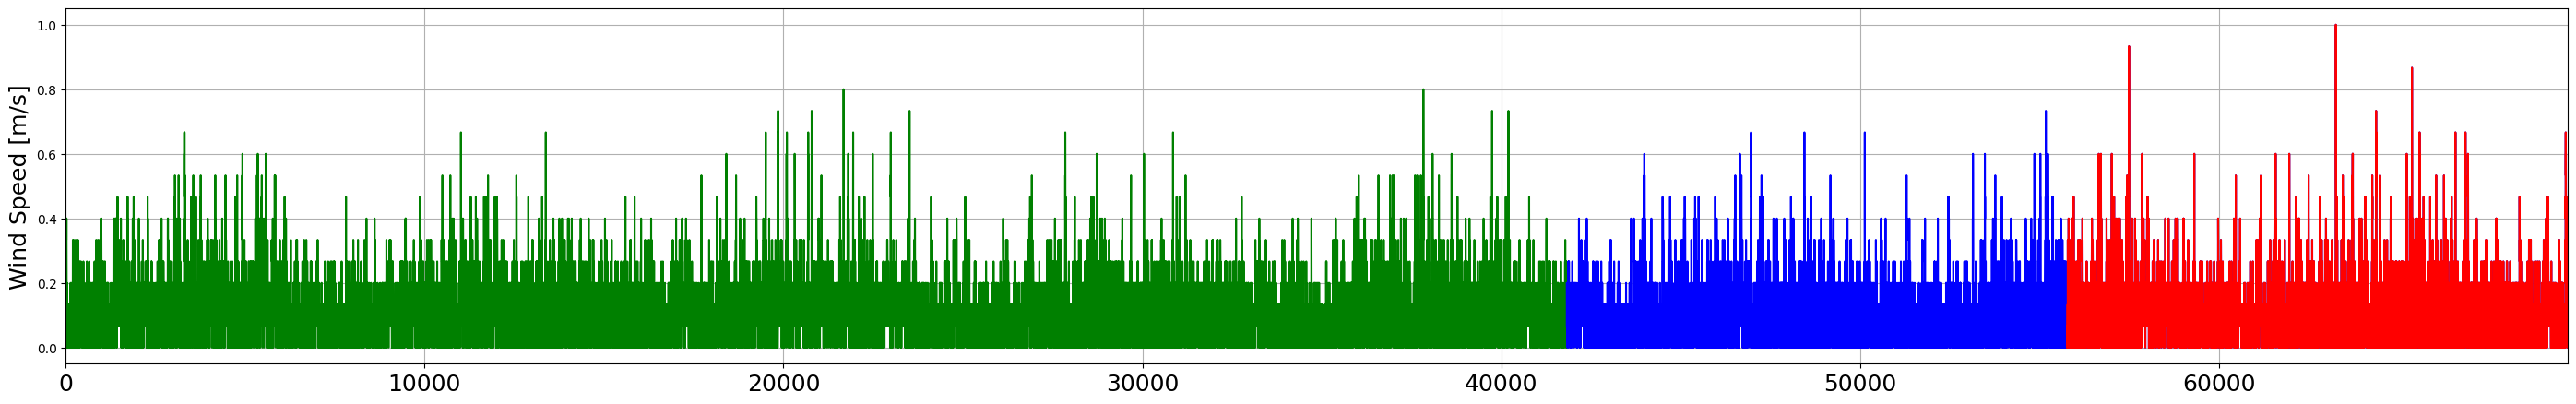

In [18]:
df_3["sped"] = pd.to_numeric(df_3["sped "], downcast="float")
timeSerie_3 = df_3.iloc[:,2].values

valueMax = max(timeSerie_3)

timeSerie_3 = (timeSerie_3-min(timeSerie_3))/(max(timeSerie_3)-min(timeSerie_3))
samples = round(len(timeSerie_3)*0.80)

timeSerie_training_3 = timeSerie_3[0:samples]
timeSerie_test_3     = timeSerie_3[samples:]
time_3 = np.arange(0, len(timeSerie_3),1)

# Ploter el conjunto de datos
plt.figure(figsize=(35,5))
plt.plot(time_3[0:round(len(timeSerie_3)*0.60)], timeSerie_3[0:round(len(timeSerie_3)*0.60)], 'g', label= 'Training samples')
plt.plot(time_3[round(len(timeSerie_3)*0.60):round(len(timeSerie_3)*0.60)+samples], timeSerie_3[round(len(timeSerie_3)*0.60):round(len(timeSerie_3)*0.60)+samples], 'b', label= 'Validation')
plt.plot(time_3[samples:], timeSerie_3[samples:], 'r', label= 'Test')
plt.xticks(fontsize=18)
plt.ylabel('Wind Speed [m/s]', fontsize=18)
plt.xlim(0, timeSerie_3.shape[0])
#plt.legend(ncol=3, prop={'size': 18})
plt.grid(True)
plt.show()

In [19]:
selectSamples_ = selectSamples(timeSerie_training_1, predictionHorizonMax, window)
X_, y_ = selectSamples_.SerieMatriz()

selectSamples_test = selectSamples(timeSerie_test_1, predictionHorizonMax, window)
X_test, y_test = selectSamples_test.SerieMatriz()

X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=0.2, random_state=42)
dataSet.update({'Chengdu_Airport_China':{'train': [X_train, y_train], 'test': [X_test, y_test], 'valid':[X_valid, y_valid]}})

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((323976, 10), (323976, 7), (80994, 10), (80994, 7), (101230, 10), (101230, 7))

#**Select samples**

**Alls data**

In [20]:
X, y = np.empty(shape=[0, window]), np.empty(shape=[0, predictionHorizonMax])

for dataName in list(dataSet.keys()):
  print(dataName)
  X = np.vstack((X, dataSet[dataName]['train'][0]))
  y = np.vstack((y, dataSet[dataName]['train'][1]))

Argone_IL
Beijing_Airport_China
Chengdu_Airport_China


**Training data**

In [21]:
X_data = dataSet[data_timeSerie]['train'][0]
y_data = dataSet[data_timeSerie]['train'][1]

X_data.shape, y_data.shape

((323976, 10), (323976, 7))

**Validation data**

In [22]:
X_valid = dataSet[data_timeSerie]['valid'][0]
y_valid = dataSet[data_timeSerie]['valid'][1]

X_valid.shape, y_valid.shape

((80994, 10), (80994, 7))

**Centroids for alls data**

In [23]:
X_aux_centroids = X

# Estandarización de las características
sc = StandardScaler()

X_aux_centroids = sc.fit_transform(X_aux_centroids)

model_KMeans = KMeans(n_clusters=n_clusters)
y_KMeans_aux_centroids = model_KMeans.fit(X_aux_centroids)
label = model_KMeans.predict(X_aux_centroids)
centroids_aux_centroids = model_KMeans.cluster_centers_
centroids_x_aux_centroids = centroids_aux_centroids[:,0]
centroids_y_aux_centroids = centroids_aux_centroids[:,1]

centroids_aux_centroids.shape

(100, 10)

#**Kernel-PCA**

Training


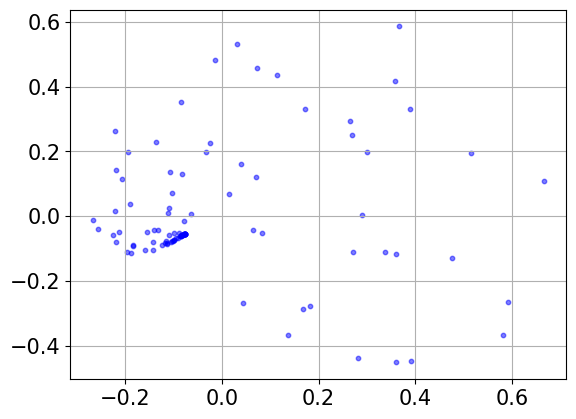

In [24]:
# Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1)

# KPCA training on the 1000 centroids
tranformed_kernel_kpca_centroids = kpca.fit_transform(centroids_aux_centroids)

plt.scatter(tranformed_kernel_kpca_centroids[:,0], tranformed_kernel_kpca_centroids[:,1], c='b', s=10, alpha=0.5)
plt.xticks(fontsize=15); plt.yticks(fontsize=15); plt.grid();
plt.show()

**Alls data**

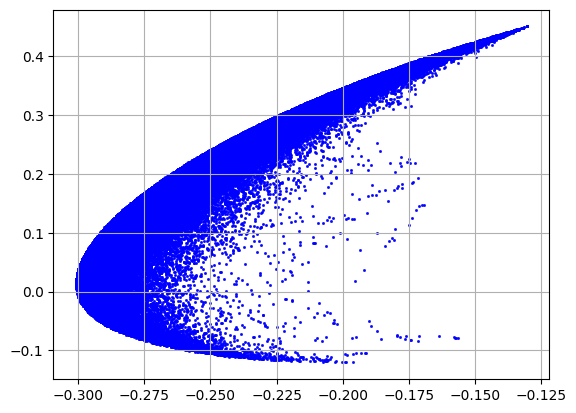

(971928, 2)

In [25]:
tranformed_kernel_kpca_all = kpca.transform(X)

plt.scatter(tranformed_kernel_kpca_all[:,0], tranformed_kernel_kpca_all[:,1], c='b', s=1, alpha=0.5)
#plt.title("Kernel-PCA Training", fontsize=15);
plt.xticks(fontsize=10); plt.yticks(fontsize=10); plt.grid();
#plt.colorbar()
plt.show()

tranformed_kernel_kpca_all.shape

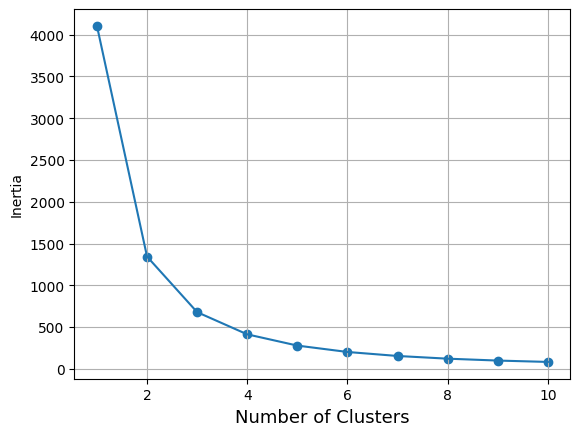

In [26]:
tranformed_kpca_data = kpca.transform(X_data)
inertia_list = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters)
    kmeans_model.fit(tranformed_kpca_data)
    inertia_list.append(kmeans_model.inertia_)

plt.plot(range(1,11), inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia")
plt.grid()
plt.show()

In [27]:
clusterNumbers = 5

In [28]:
tranformed_kpca_data.shape

(323976, 2)

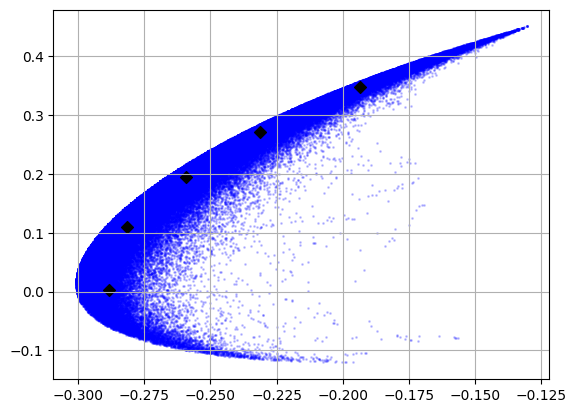

In [29]:
model_KMeans = KMeans(n_clusters=int(clusterNumbers))
y_KMeans = model_KMeans.fit(tranformed_kpca_data)
label = model_KMeans.predict(tranformed_kpca_data)
centroids = model_KMeans.cluster_centers_
centroids_x_kpca = centroids[:,0]
centroids_y_kpca = centroids[:,1]

plt.scatter(tranformed_kpca_data[:,0], tranformed_kpca_data[:,1], c='b', s=1, alpha=0.2)
plt.scatter(centroids_x_kpca, centroids_y_kpca, marker='D', c='k')
plt.yticks(fontsize=10); plt.xticks(fontsize=10); plt.grid();
plt.show()

In [30]:
centroids

array([[-0.28141878,  0.11027392],
       [-0.1933896 ,  0.34857197],
       [-0.25921994,  0.19556594],
       [-0.28813867,  0.00358822],
       [-0.23134269,  0.27086451]])

#**Training and results**

In [31]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_train.shape, X_valid.shape, X_test.shape

((323976, 10, 1), (80994, 10, 1), (101230, 10, 1))

 ----------------------------------  1e-06  ---------------------------------- 
3164/3164 [==============================] - 19s 6ms/step


3164/3164 [==============================] - 31s 10ms/step


3164/3164 [==============================] - 28s 9ms/step


<Figure size 640x480 with 0 Axes>

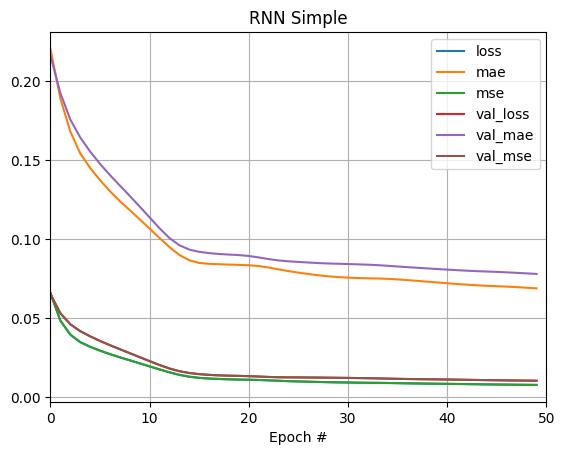

╒═══════════╤═════════╤═════════╤════════╤════════╤═════════╤═════════╤═════════╕
│ Metrics   │       1 │       2 │      3 │      4 │       5 │       6 │       7 │
╞═══════════╪═════════╪═════════╪════════╪════════╪═════════╪═════════╪═════════╡
│ MSE       │ 0.092   │ 0.08    │ 0.093  │ 0.094  │ 0.099   │ 0.103   │ 0.099   │
├───────────┼─────────┼─────────┼────────┼────────┼─────────┼─────────┼─────────┤
│ RMSE      │ 0.008   │ 0.006   │ 0.009  │ 0.009  │ 0.01    │ 0.011   │ 0.01    │
├───────────┼─────────┼─────────┼────────┼────────┼─────────┼─────────┼─────────┤
│ MAE       │ 0.068   │ 0.061   │ 0.07   │ 0.073  │ 0.077   │ 0.078   │ 0.077   │
├───────────┼─────────┼─────────┼────────┼────────┼─────────┼─────────┼─────────┤
│ MAPE      │ 6.80044 │ 6.09229 │ 6.9903 │ 7.3119 │ 7.69886 │ 7.84934 │ 7.67804 │
├───────────┼─────────┼─────────┼────────┼────────┼─────────┼─────────┼─────────┤
│ R2        │ 0.294   │ 0.462   │ 0.283  │ 0.254  │ 0.182   │ 0.111   │ 0.186   │
╘═══════════╧═══

<Figure size 640x480 with 0 Axes>

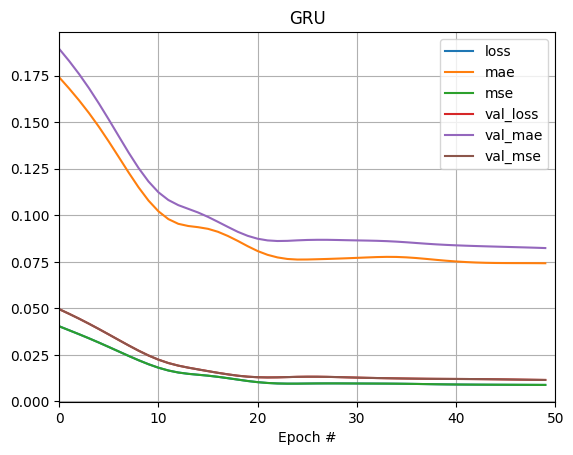

╒═══════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ Metrics   │       1 │       2 │       3 │       4 │       5 │       6 │       7 │
╞═══════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ MSE       │ 0.094   │ 0.1     │ 0.096   │ 0.103   │ 0.1     │ 0.102   │ 0.104   │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ RMSE      │ 0.009   │ 0.01    │ 0.009   │ 0.011   │ 0.01    │ 0.01    │ 0.011   │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ MAE       │ 0.072   │ 0.076   │ 0.075   │ 0.078   │ 0.079   │ 0.079   │ 0.08    │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ MAPE      │ 7.16909 │ 7.60346 │ 7.47395 │ 7.79866 │ 7.87472 │ 7.88244 │ 8.02932 │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ R2        │ 0.269   │ 0.156   │ 0.23    │ 0.106   │ 0.158   │ 0.123   │ 0.

<Figure size 640x480 with 0 Axes>

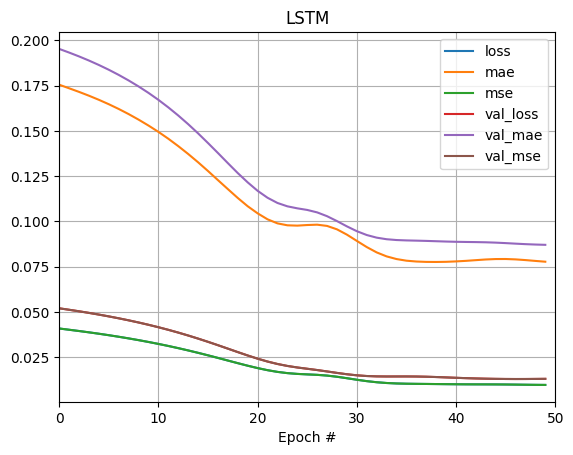

╒═══════════╤═════════╤══════════╤══════════╤═════════╤═════════╤═════════╤═════════╕
│ Metrics   │       1 │        2 │        3 │       4 │       5 │       6 │       7 │
╞═══════════╪═════════╪══════════╪══════════╪═════════╪═════════╪═════════╪═════════╡
│ MSE       │ 0.106   │  0.112   │  0.111   │ 0.105   │ 0.107   │ 0.106   │ 0.105   │
├───────────┼─────────┼──────────┼──────────┼─────────┼─────────┼─────────┼─────────┤
│ RMSE      │ 0.011   │  0.013   │  0.012   │ 0.011   │ 0.011   │ 0.011   │ 0.011   │
├───────────┼─────────┼──────────┼──────────┼─────────┼─────────┼─────────┼─────────┤
│ MAE       │ 0.08    │  0.083   │  0.082   │ 0.081   │ 0.081   │ 0.082   │ 0.083   │
├───────────┼─────────┼──────────┼──────────┼─────────┼─────────┼─────────┼─────────┤
│ MAPE      │ 7.97322 │  8.33235 │  8.24341 │ 8.06756 │ 8.10698 │ 8.20158 │ 8.27924 │
├───────────┼─────────┼──────────┼──────────┼─────────┼─────────┼─────────┼─────────┤
│ R2        │ 0.054   │ -0.056   │ -0.031   │ 0.08    

3164/3164 [==============================] - 32s 10ms/step


3164/3164 [==============================] - 28s 9ms/step


<Figure size 640x480 with 0 Axes>

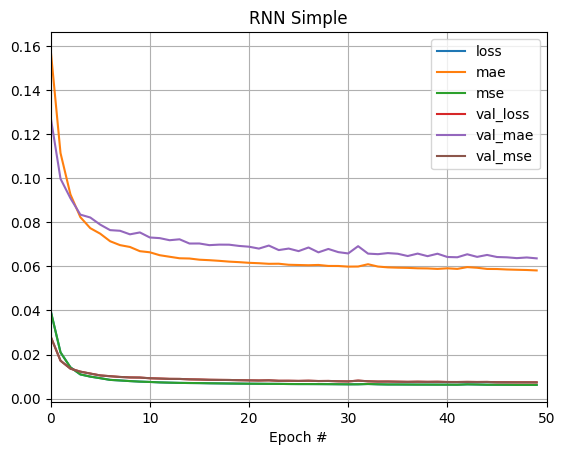

╒═══════════╤═════════╤═════════╤════════╤═════════╤═════════╤═════════╤═════════╕
│ Metrics   │       1 │       2 │      3 │       4 │       5 │       6 │       7 │
╞═══════════╪═════════╪═════════╪════════╪═════════╪═════════╪═════════╪═════════╡
│ MSE       │ 0.042   │ 0.061   │ 0.072  │ 0.081   │ 0.086   │ 0.09    │ 0.094   │
├───────────┼─────────┼─────────┼────────┼─────────┼─────────┼─────────┼─────────┤
│ RMSE      │ 0.002   │ 0.004   │ 0.005  │ 0.007   │ 0.007   │ 0.008   │ 0.009   │
├───────────┼─────────┼─────────┼────────┼─────────┼─────────┼─────────┼─────────┤
│ MAE       │ 0.031   │ 0.046   │ 0.054  │ 0.061   │ 0.066   │ 0.07    │ 0.073   │
├───────────┼─────────┼─────────┼────────┼─────────┼─────────┼─────────┼─────────┤
│ MAPE      │ 3.14545 │ 4.55457 │ 5.3718 │ 6.08746 │ 6.56368 │ 6.95729 │ 7.34535 │
├───────────┼─────────┼─────────┼────────┼─────────┼─────────┼─────────┼─────────┤
│ R2        │ 0.852   │ 0.693   │ 0.573  │ 0.456   │ 0.383   │ 0.329   │ 0.263   │
╘═══

<Figure size 640x480 with 0 Axes>

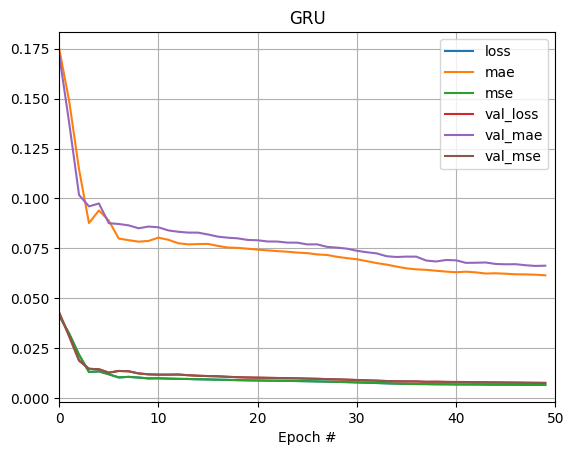

╒═══════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ Metrics   │       1 │       2 │       3 │       4 │       5 │       6 │       7 │
╞═══════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ MSE       │ 0.051   │ 0.065   │ 0.072   │ 0.08    │ 0.088   │ 0.094   │ 0.098   │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ RMSE      │ 0.003   │ 0.004   │ 0.005   │ 0.006   │ 0.008   │ 0.009   │ 0.01    │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ MAE       │ 0.039   │ 0.049   │ 0.055   │ 0.062   │ 0.068   │ 0.073   │ 0.077   │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ MAPE      │ 3.87532 │ 4.91752 │ 5.47589 │ 6.18963 │ 6.82014 │ 7.27464 │ 7.68015 │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ R2        │ 0.782   │ 0.652   │ 0.571   │ 0.461   │ 0.354   │ 0.269   │ 0.

<Figure size 640x480 with 0 Axes>

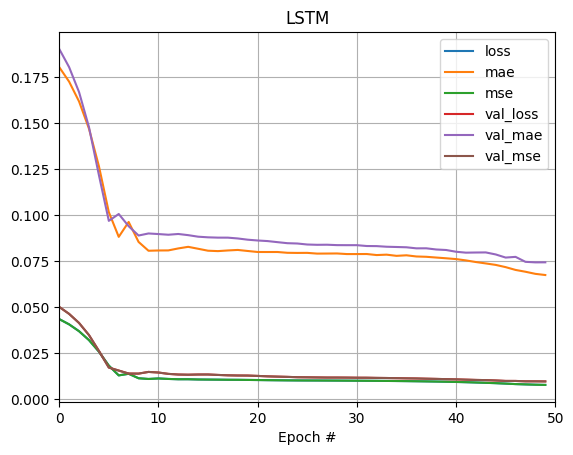

╒═══════════╤════════╤═════════╤═════════╤═════════╤═════════╤════════╤═════════╕
│ Metrics   │      1 │       2 │       3 │       4 │       5 │      6 │       7 │
╞═══════════╪════════╪═════════╪═════════╪═════════╪═════════╪════════╪═════════╡
│ MSE       │ 0.07   │ 0.079   │ 0.088   │ 0.091   │ 0.095   │ 0.098  │ 0.1     │
├───────────┼────────┼─────────┼─────────┼─────────┼─────────┼────────┼─────────┤
│ RMSE      │ 0.005  │ 0.006   │ 0.008   │ 0.008   │ 0.009   │ 0.01   │ 0.01    │
├───────────┼────────┼─────────┼─────────┼─────────┼─────────┼────────┼─────────┤
│ MAE       │ 0.053  │ 0.06    │ 0.066   │ 0.07    │ 0.073   │ 0.076  │ 0.078   │
├───────────┼────────┼─────────┼─────────┼─────────┼─────────┼────────┼─────────┤
│ MAPE      │ 5.3077 │ 5.96732 │ 6.59186 │ 6.96292 │ 7.30991 │ 7.6297 │ 7.79097 │
├───────────┼────────┼─────────┼─────────┼─────────┼─────────┼────────┼─────────┤
│ R2        │ 0.585  │ 0.484   │ 0.354   │ 0.31    │ 0.253   │ 0.192  │ 0.162   │
╘═══════════╧═══

3164/3164 [==============================] - 32s 10ms/step


3164/3164 [==============================] - 28s 9ms/step


<Figure size 640x480 with 0 Axes>

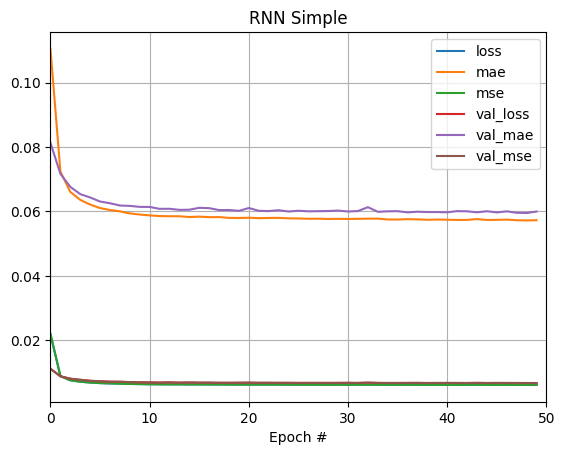

╒═══════════╤═════════╤═════════╤═════════╤═════════╤═════════╤════════╤═════════╕
│ Metrics   │       1 │       2 │       3 │       4 │       5 │      6 │       7 │
╞═══════════╪═════════╪═════════╪═════════╪═════════╪═════════╪════════╪═════════╡
│ MSE       │ 0.039   │ 0.055   │ 0.066   │ 0.075   │ 0.082   │ 0.088  │ 0.092   │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────┼─────────┤
│ RMSE      │ 0.002   │ 0.003   │ 0.004   │ 0.006   │ 0.007   │ 0.008  │ 0.008   │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────┼─────────┤
│ MAE       │ 0.029   │ 0.041   │ 0.05    │ 0.057   │ 0.063   │ 0.067  │ 0.071   │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────┼─────────┤
│ MAPE      │ 2.87147 │ 4.11702 │ 4.99612 │ 5.70219 │ 6.32723 │ 6.7464 │ 7.12134 │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────┼─────────┤
│ R2        │ 0.872   │ 0.749   │ 0.635   │ 0.528   │ 0.434   │ 0.357  │ 0.292   │
╘═══

<Figure size 640x480 with 0 Axes>

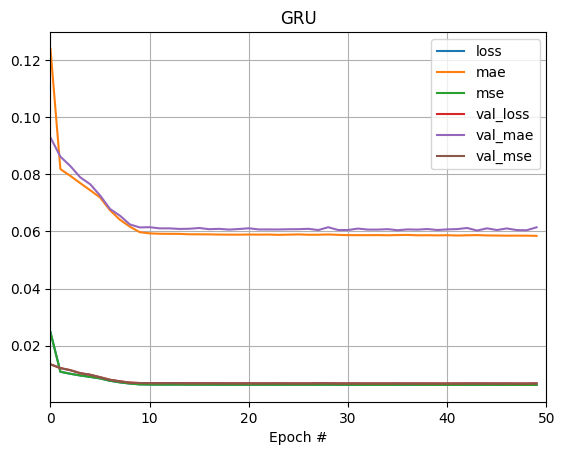

╒═══════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ Metrics   │       1 │       2 │       3 │       4 │       5 │       6 │       7 │
╞═══════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ MSE       │ 0.039   │ 0.055   │ 0.066   │ 0.075   │ 0.082   │ 0.088   │ 0.092   │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ RMSE      │ 0.002   │ 0.003   │ 0.004   │ 0.006   │ 0.007   │ 0.008   │ 0.009   │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ MAE       │ 0.03    │ 0.041   │ 0.051   │ 0.058   │ 0.064   │ 0.068   │ 0.072   │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ MAPE      │ 2.95138 │ 4.10095 │ 5.07991 │ 5.75351 │ 6.40427 │ 6.84705 │ 7.23271 │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ R2        │ 0.872   │ 0.751   │ 0.632   │ 0.531   │ 0.433   │ 0.355   │ 0.

<Figure size 640x480 with 0 Axes>

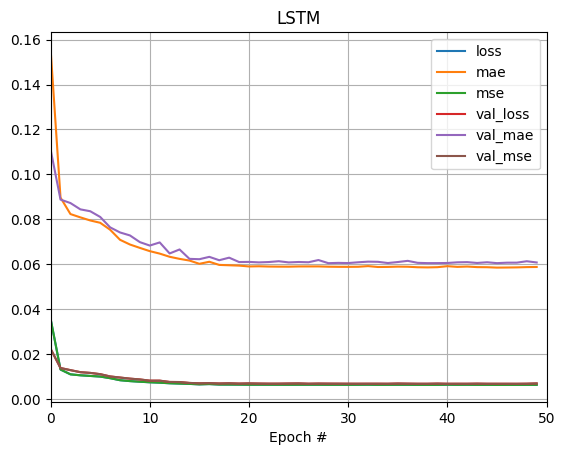

╒═══════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤════════╕
│ Metrics   │       1 │       2 │       3 │       4 │       5 │       6 │      7 │
╞═══════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪════════╡
│ MSE       │ 0.042   │ 0.057   │ 0.068   │ 0.077   │ 0.084   │ 0.089   │ 0.094  │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────┤
│ RMSE      │ 0.002   │ 0.003   │ 0.005   │ 0.006   │ 0.007   │ 0.008   │ 0.009  │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────┤
│ MAE       │ 0.031   │ 0.042   │ 0.051   │ 0.058   │ 0.063   │ 0.068   │ 0.071  │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────┤
│ MAPE      │ 3.07544 │ 4.21984 │ 5.06815 │ 5.76922 │ 6.33698 │ 6.78531 │ 7.1471 │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────┤
│ R2        │ 0.856   │ 0.73    │ 0.617   │ 0.508   │ 0.415   │ 0.339   │ 0.269  │
╘═══

3164/3164 [==============================] - 32s 10ms/step


3164/3164 [==============================] - 28s 8ms/step


<Figure size 640x480 with 0 Axes>

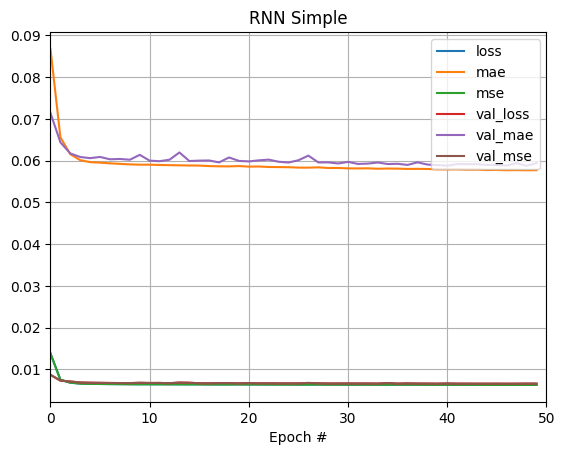

╒═══════════╤════════╤═════════╤═════════╤═════════╤═════════╤═════════╤════════╕
│ Metrics   │      1 │       2 │       3 │       4 │       5 │       6 │      7 │
╞═══════════╪════════╪═════════╪═════════╪═════════╪═════════╪═════════╪════════╡
│ MSE       │ 0.038  │ 0.055   │ 0.067   │ 0.075   │ 0.082   │ 0.088   │ 0.092  │
├───────────┼────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────┤
│ RMSE      │ 0.001  │ 0.003   │ 0.004   │ 0.006   │ 0.007   │ 0.008   │ 0.008  │
├───────────┼────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────┤
│ MAE       │ 0.028  │ 0.041   │ 0.051   │ 0.058   │ 0.063   │ 0.068   │ 0.071  │
├───────────┼────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────┤
│ MAPE      │ 2.8056 │ 4.10006 │ 5.11952 │ 5.76196 │ 6.25652 │ 6.76686 │ 7.1073 │
├───────────┼────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────┤
│ R2        │ 0.879  │ 0.751   │ 0.628   │ 0.53    │ 0.437   │ 0.358   │ 0.293  │
╘═══════════╧═══

<Figure size 640x480 with 0 Axes>

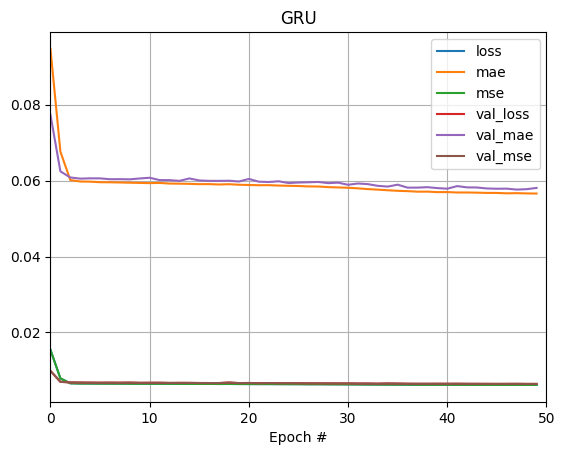

╒═══════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ Metrics   │       1 │       2 │       3 │       4 │       5 │       6 │       7 │
╞═══════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ MSE       │ 0.038   │ 0.054   │ 0.066   │ 0.074   │ 0.082   │ 0.088   │ 0.092   │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ RMSE      │ 0.001   │ 0.003   │ 0.004   │ 0.006   │ 0.007   │ 0.008   │ 0.008   │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ MAE       │ 0.028   │ 0.041   │ 0.049   │ 0.057   │ 0.063   │ 0.067   │ 0.071   │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ MAPE      │ 2.79506 │ 4.06028 │ 4.94864 │ 5.67429 │ 6.25917 │ 6.74578 │ 7.14555 │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ R2        │ 0.88    │ 0.754   │ 0.641   │ 0.536   │ 0.441   │ 0.36    │ 0.

<Figure size 640x480 with 0 Axes>

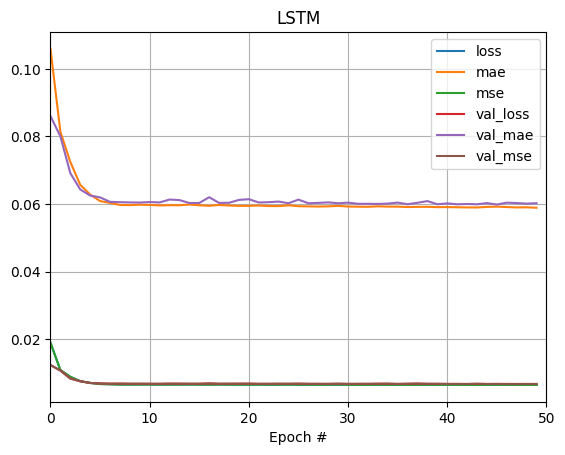

╒═══════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ Metrics   │       1 │       2 │       3 │       4 │       5 │       6 │       7 │
╞═══════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ MSE       │ 0.038   │ 0.055   │ 0.066   │ 0.075   │ 0.082   │ 0.088   │ 0.092   │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ RMSE      │ 0.001   │ 0.003   │ 0.004   │ 0.006   │ 0.007   │ 0.008   │ 0.008   │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ MAE       │ 0.028   │ 0.041   │ 0.05    │ 0.057   │ 0.063   │ 0.068   │ 0.071   │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ MAPE      │ 2.84244 │ 4.12811 │ 4.99723 │ 5.69755 │ 6.28594 │ 6.76585 │ 7.14219 │
├───────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ R2        │ 0.876   │ 0.748   │ 0.637   │ 0.533   │ 0.439   │ 0.357   │ 0.

In [32]:
index = None
count = 0
centroidValues_y = np.zeros((len(centroids_x_kpca), len(thresholds)))

for threshold in thresholds:

  print(' ---------------------------------- ', threshold, ' ---------------------------------- ')

  for j in np.arange(0,(len(centroids_x_kpca))):

    # Distancia euclidea
    num = np.linalg.norm(centroids[j]-tranformed_kernel_kpca_all, axis=1)**2
    result = np.where(num < threshold)

    centroidValues_y[j, count] = len(result[0])

    #print('Cluster {cluster}: {samples}'.format(cluster=j+1, samples=len(result[0]) ))

    if index is None:
      index = result[0]
    else:
      index = np.hstack((index, result[0]))

  count += 1

  # Select sanmples
  index = list(np.unique(index))

  X_train = X[index,:]
  y_train = y[index]

  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

  # Training models
  forecastingWind = ForecastingModels(X_train, X_test, X_valid, y_train, y_valid, y_test, neurons, batch_size, epochs)

  # Results models
  model_RNNSimple, plot_RNNSimple, results_RNNSimple, metrics_RNNSimple, forecasting_RNNSimple = forecastingWind.RNNSimple_Model()
  model_GRU, plot_GRU, results_GRU, metrics_GRU, forecasting_GRU = forecastingWind.GRU_Model()
  model_LSTM, plot_LSTM, results_LSTM, metrics_LSTM, forecasting_LSTM = forecastingWind.LSTM_Model()

  plt.figure()
  plot_RNNSimple.plot()
  plt.title("RNN Simple")
  plt.xlabel("Epoch #")
  plt.xlim(0,epochs)
  plt.grid()
  plt.show()

  print(results_RNNSimple)

  plt.figure()
  plot_GRU.plot()
  plt.title("GRU")
  plt.xlabel("Epoch #")
  plt.xlim(0,epochs)
  plt.grid()
  plt.show()

  print(results_GRU)

  plt.figure()
  plot_LSTM.plot()
  plt.title("LSTM")
  plt.xlabel("Epoch #")
  plt.xlim(0,epochs)
  plt.grid()
  plt.show()

  print(results_LSTM)


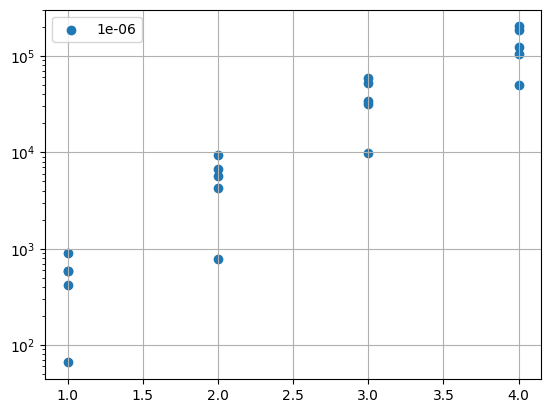

In [33]:
centroidValues_x = np.tile(np.arange(1, centroidValues_y.shape[1]+1, 1), (centroidValues_y.shape[0], 1))

plt.scatter(centroidValues_x, centroidValues_y)
plt.yscale("log")
plt.legend(thresholds)
plt.grid()
plt.show()

In [34]:
centroidValues_y

array([[4.23000e+02, 4.30500e+03, 3.43290e+04, 1.24758e+05],
       [5.82000e+02, 5.63100e+03, 3.13710e+04, 1.05015e+05],
       [5.88000e+02, 6.70200e+03, 5.17110e+04, 1.85391e+05],
       [6.60000e+01, 7.77000e+02, 9.91200e+03, 4.94520e+04],
       [8.94000e+02, 9.27300e+03, 5.92440e+04, 2.01570e+05]])

In [35]:
pwd

'/content/Predictive-Modeling-Using-a-Clustering-Based-Approach'

In [36]:
import pickle

save = {'TimeSerie': timeSerie_1,
        'RNN': forecasting_RNNSimple,
        'GRU': forecasting_GRU,
        'LSTM': forecasting_LSTM,
        'X_test': X_test,
        'Test': y_test}

with open('ArgonelIL.pkl', 'wb') as f:
    pickle.dump(save, f, protocol=pickle.HIGHEST_PROTOCOL)


In [37]:
model_RNNSimple.save('model_RNNSimple.h5')
model_GRU.save('model_GRU.h5')
model_LSTM.save('model_LSTM.h5')